In [ ]:
#The code below produces a plot of the Contnuous Hahn Poisson flow as described in the paper:
#"Visualising the flows of orthogonal polynomial expansions of the Riemann Xi-function".
#The first part precomputes the coefficients of the polynomial expansion and stores it in a file.
#The second part reads the file and produces an implicit plot, i.e. visualises the flow of the real roots.
#The accuracy of the computations depends on:
# 1. the precision of the ComplexBallField (2048), 
# 2. the integral limits (200),
# 3. the number of terms in the expansion (500)
#These have been set such that X^{\mathcal{G}}_1(80) evaluates correctly at more than 20 digits accuracy. 
#Version 1.0, 23 feb 2024 

In [1]:
#Generate a plot of all ordinates of the non-trivial zeros < 80 to overlay the flow graphs
var('y')
m1 = []
with open("ordinateszetazeros.txt", "r") as f: #file is stored on GitHub
    for row in f:
        y=float(row)
        if y < 80:
            m1.append([y,1])

z=list_plot(m1, size=12, marker="o", color = "red")

In [4]:
#Continuous Hahn coefficients precomputation d_n
CCF=ComplexBallField(2048)
def Xi(t):
    f=CCF("0.5",0)+I*CCF(t)
    xi=f/2*(f-1)*CCF(pi).pow(-f/2)*(f/2).gamma()*f.zeta()
    return xi

def gamfact(s):
    f=CCF("0.75",0)+I*CCF(s/2)
    gam=f.gamma(); gam=gam.abs(); gam=gam*gam*gam*gam
    return gam

def hyp(s,n):
    f1=CCF("0.75",0)+I*CCF(s/2)
    hyp=CCF(1,0).hypergeometric([-n,n+2,f1],[3/2,3/2])
    return hyp

def integrand(x,n):
    integr=Xi(x)*gamfact(x)*hyp(x,n)
    return integr

def dn(n,M):
    prefac=(-1)^n*CCF(n+1,0).pow(2)*16/(CCF(pi).pow(3))
    res=prefac*CCF.integral(lambda x, _: integrand(x,n), 0, M)
    return real_part(res)

def gendcoeffs(N,M):
    f = open("dncoeff", "w")
    for n in range(N):
        if Mod(n,2) == 1:
            f.write("0"); f.write("\r\n") #the coefficient is 0 for odd n
        else:
            f.write(str(dn(n,M).mid()));f.write("\r\n")
    f.close() 
    return 0

gendcoeffs(500,200)

0

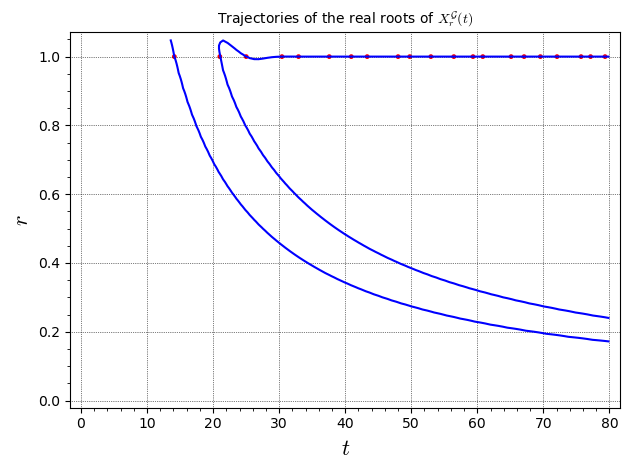

In [6]:
var("r","t");

RDF=RealBallField(1400)
global m1; m1 = []
with open("dncoeff", "r") as f:
    for row in f:
        m1.append([RDF(row)])

CCF=ComplexBallField(1400)
def hyp(t,n):
    f1=CCF("0.75",0)+I*CCF(t/2)
    hyp=CCF(1,0).hypergeometric([-n,n+2,f1],[3/2,3/2])
    return hyp

def ContHahnFlow(r,t):
    sum=CCF(0)
    for n in range(200):
        sum=sum+CCF(str(r),0).pow(n)*CCF(str(m1[n]))*hyp(t,n)
    return real_part(sum)

a=implicit_plot(lambda t,r:((RDF(ContHahnFlow(r,t)))),(t,0,80),(r,0,1.05),color='blue',axes_labels=['$t$','$r$'],title=r'Trajectories of the real roots of $X^{\mathcal{G}}_r(t)$',gridlines=True,plot_points=120)
show(a+z,aspect_ratio='automatic')

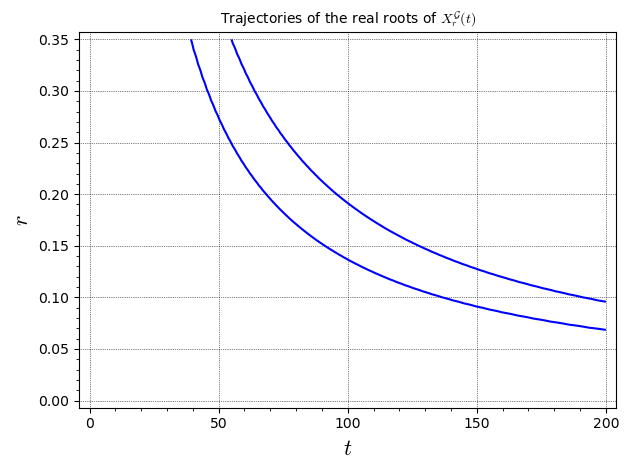

In [9]:
var("r","t");

RDF=RealBallField(1400)
global m1; m1 = []
with open("dncoeff", "r") as f:
    for row in f:
        m1.append([RDF(row)])

CCF=ComplexBallField(1400)
def hyp(t,n):
    f1=CCF("0.75",0)+I*CCF(t/2)
    hyp=CCF(1,0).hypergeometric([-n,n+2,f1],[3/2,3/2])
    return hyp

def ContHahnFlow(r,t):
    sum=CCF(0)
    for n in range(200):
        sum=sum+CCF(str(r),0).pow(n)*CCF(str(m1[n]))*hyp(t,n)
    return real_part(sum)

a=implicit_plot(lambda t,r:((RDF(ContHahnFlow(r,t)))),(t,0,200),(r,0.0,0.35),color='blue',axes_labels=['$t$','$r$'],title=r'Trajectories of the real roots of $X^{\mathcal{G}}_r(t)$',gridlines=True,plot_points=120)
show(a,aspect_ratio='automatic')